1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
84
100
101
102
103
104
105
106
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
134
135
136
137
138
139
140
141
142
143
144
145
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
208
210
211
212
213
214
215
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


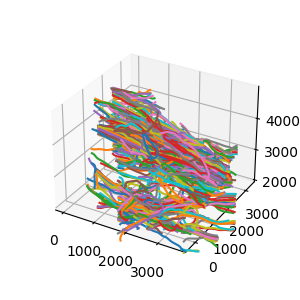

In [1]:
%matplotlib ipympl

from scipy.interpolate import splprep,splev
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import fmin
from tqdm.notebook import tqdm as log_progress
from interpolation import *
from filaments import *

node_dic, edge_list, annotation_edge_dict = parse_nml("/groups/cellmap/cellmap/jonesa/trackmate/fordavid/vimentin_updated.nml", edge_attribute=None)
s = (1850,1500,2500)

output = np.zeros(s,dtype=np.uint8)
max_x,max_y,max_z = 0,0,0
num_edges = []

count=0
all_bin_to_cos_theta_dict = []
bin_to_cos_theta_dict = {}
bin_to_R_squared_dict = {}
bin_to_delta_squared_dict = {}

all_coords = []

filaments = Filaments(bin_size = 50)
for id,edge_list in annotation_edge_dict.items():
    print(id)
    #if count==587:
    if len(edge_list)>0:
        filaments.add_filament(id, node_dic, edge_list)
        coords = filaments.filament_list[-1].coords
        all_coords.append(coords) 
        #all_bin_to_cos_theta_dict.append(current_bin_to_cos_theta_dict)

        if count==0:
            fig = plt.figure(figsize=(3,3))
            ax = fig.add_subplot(111,projection='3d')
        #ax.scatter3D(x,y,z, c='r')
        #ax.plot3D(x,y,z, '-', c='r')
        ax.plot3D(coords[:,0],coords[:,1],coords[:,2], '-')
        if count==0:
            ax.set_aspect('equal')
    count+=1

filaments.combine_filaments_info()


In [2]:
%%time 
filaments.calculate_bundles(cutoff_distance=100)

CPU times: user 1min 53s, sys: 223 ms, total: 1min 53s
Wall time: 1min 53s


[[  4]
 [  5]
 [  9]
 [ 11]
 [ 14]
 [ 15]
 [ 16]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 25]
 [ 26]
 [ 31]
 [ 32]
 [ 34]
 [ 37]
 [ 38]
 [ 40]
 [ 42]
 [ 43]
 [ 46]
 [ 48]
 [ 49]
 [ 51]
 [ 52]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 62]
 [ 63]
 [ 68]
 [ 70]
 [ 73]
 [ 74]
 [ 77]
 [ 79]
 [ 80]
 [ 81]
 [ 83]
 [ 85]
 [ 86]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [109]
 [110]
 [111]
 [114]
 [117]
 [118]
 [119]
 [120]
 [121]
 [125]
 [129]
 [132]
 [133]
 [135]
 [137]
 [140]
 [141]
 [143]
 [144]
 [150]
 [155]
 [157]
 [158]
 [168]
 [169]
 [170]
 [176]
 [184]
 [191]
 [199]
 [201]
 [204]
 [209]
 [210]
 [215]
 [216]
 [217]
 [221]
 [224]
 [226]
 [230]
 [236]
 [244]
 [249]
 [250]
 [256]
 [257]
 [258]
 [263]
 [274]
 [275]
 [276]
 [278]
 [280]
 [283]
 [286]
 [287]
 [289]
 [290]
 [297]
 [298]
 [299]
 [300]
 [307]
 [312]
 [316]
 [317]
 [319]
 [322]
 [323]
 [324]
 [326]
 [327]
 [328]
 [329]
 [331]
 [332]
 [337]
 [338]
 [339]
 [343]
 [344]
 [352]
 [358]
 [364]

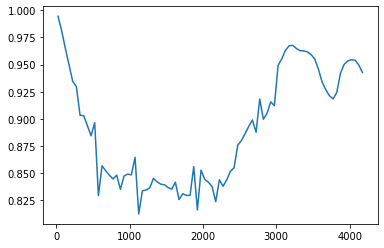

In [20]:
import matplotlib
filaments.calculate_bundles(cutoff_distance=50,cutoff_fraction=0.5, cutoff_angle=45)
total = np.sum(filaments.are_bundled,axis=1)
print(np.argwhere(total==0))
%matplotlib inline
d = filaments.filament_list[4].bin_to_cos_theta_dict
x=[]
y = []
for k,v in d.items():
    x.append(k)
    y.append(np.mean(v))
plt.plot(x,y)

In [7]:
for i in range(filaments.are_bundled.shape[0]):
    for j in range(filaments.are_bundled.shape[1]):
        if filaments.are_bundled[i,j]:
            print(filaments.filament_list[i].id,filaments.filament_list[j].id)
total = np.sum(filaments.are_bundled,axis=1)

9 8
30 338
31 40
34 341
46 87
49 46
49 48
49 87
52 150
55 54
87 46
90 92
111 112
112 111
119 130
119 147
119 222
130 119
130 147
134 197
137 138
137 164
143 57
143 89
147 119
147 130
150 52
154 41
167 169
167 170
169 2
169 167
169 170
169 201
171 172
171 200
172 171
172 189
174 8
174 366
179 180
179 181
179 182
179 183
180 179
180 181
180 182
180 317
181 179
181 180
181 182
181 183
181 317
182 179
182 180
182 183
183 179
183 182
185 186
185 213
185 469
186 185
186 469
189 171
189 172
189 257
200 171
200 173
201 2
201 169
201 170
203 193
203 364
204 4
204 258
205 128
210 49
210 87
210 148
210 211
210 270
210 289
210 323
212 56
212 57
213 185
222 119
224 265
230 87
231 282
238 234
238 239
240 109
240 234
240 252
240 414
243 244
244 243
249 235
250 244
252 109
252 234
252 240
252 414
253 164
254 284
257 128
257 189
258 4
258 204
263 141
272 119
272 130
278 8
282 231
285 98
285 255
285 284
291 10
293 262
294 42
294 43
294 74
297 296
303 304
308 309
309 308
309 107
314 177
314 208
315 304
3

In [114]:
filaments.cos_theta.shape

(2880900, 2)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,)  and requested shape (80,)

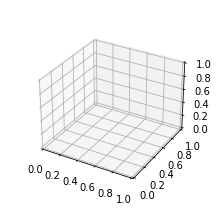

In [22]:
%matplotlib ipympl
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(x,y,z,'r-o')
us = np.unique(tck[0])
midpoint_u = [(us[i+1]+us[i])/2 for i in range(len(us)-1)]
#print(midpoint_u)
ax.plot3D(new_x,new_y,new_z, '-')
#ax.plot3D(x[0:2:-1],y[0:2:-1],z[0:2:-1],'ro')
#ax.plot3D(x[0::3],y[0::3],z[0::3],'-')
temp_x,temp_y,temp_z = splev(midpoint_u,tck)
#print(len(u),len(x),len(us),len(midpoint_u),len(temp_x))
ax.plot3D(temp_x,temp_y,temp_z,'ko')


from skspatial.objects import Line

point = [5, -5, 3]
line = Line([5, 2, -3], [3, 8, 2])
line_point_distance = line.distance_point([5, -5, 3]).round(3)
point_projected = line.project_point(point)

from scipy.optimize import fmin
def distance_to_spline(u,tck,point):
    point_on_spline = np.array(splev(u,tck)).flatten()
    return np.linalg.norm(point_on_spline-point)

print(np.array(splev([us[0],us[8]],tck))[:,0])
point = np.array(splev([us[0],us[8]],tck)).mean(axis=1)
print(us[0],us[8])
u_guess = (us[0]+us[8])/2
res = fmin(distance_to_spline,u_guess,(tck,point),full_output=True)
splev(res[0],tck,der=1)



In [122]:
from scipy.optimize import curve_fit
from scipy.optimize import fmin
#np.s_[2::2]
#s definition: https://static-content.springer.com/esm/art%3A10.1186%2F1751-0473-9-16/MediaObjects/13029_2013_116_MOESM1_ESM.pdf

# NOTE: needs to be self avoiding?
def fit_cos_theta(l,mean_cos_theta, stop_nm, start_nm=0, s=1):
    valid_ids = np.where((l>=start_nm) & (l<=stop_nm))[0]
    start_id = valid_ids[0]
    stop_id = valid_ids[-1]+1
    def func(l, P):
        return np.exp(-l/(s*P))
    popt, pcov = curve_fit(func, l[start_id:stop_id],mean_cos_theta[start_id:stop_id])
    return popt[0]

def fit_R_squared(l,mean_R_squared,stop_nm, start_nm=0, s=1):
    valid_ids = np.where((l>=start_nm) & (l<=stop_nm))[0]
    start_id = valid_ids[0]
    stop_id = valid_ids[-1]+1
    def func(l, P):
        return 2*s*P*l*(1-s*(P/l)*(1-np.exp(-l/(s*P))))
    popt, pcov = curve_fit(func, l[start_id:stop_id],mean_R_squared[start_id:stop_id])
    return popt[0]

def fit_delta_squared(L, mean_delta_squared, stop_nm, start_nm=0, s=1):
    valid_ids = np.where((L>=start_nm) & (L<=stop_nm))[0]
    start_id = valid_ids[0]
    stop_id = valid_ids[-1]+1
    # NOTE: l~L for L<<P
    def func(L, P):
        return (L**3)/(24*s*P)
    popt, pcov = curve_fit(func, L[start_id:stop_id], mean_delta_squared[start_id:stop_id])
    return popt[0]

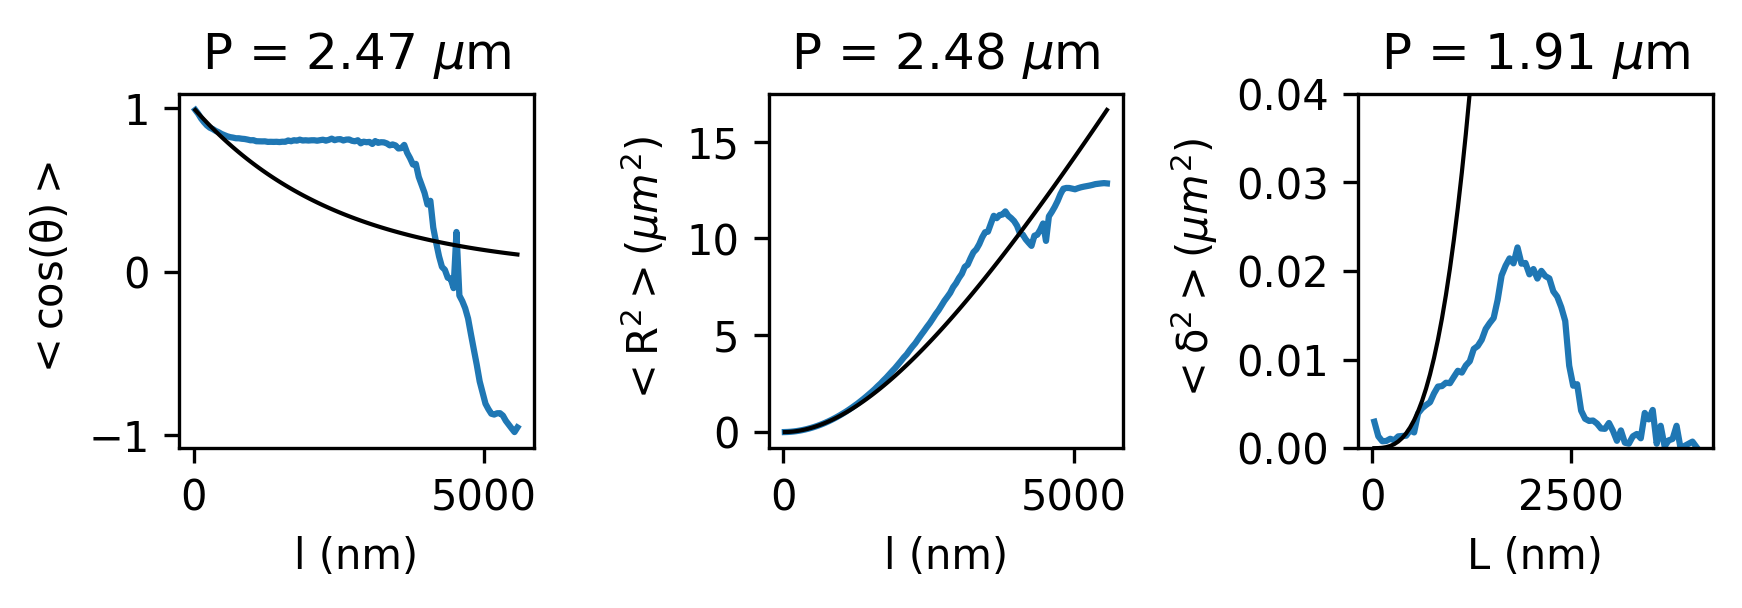

In [162]:
%matplotlib inline
from collections import OrderedDict
# current_dict = filaments.filament_list[-1].bin_to_R_squared_dict
plt.subplots(1,3,dpi=300)
s=1
ax = plt.subplot(1,3,1)
ax.set_box_aspect(1)
current_dict = filaments.bin_to_cos_theta_dict
current_dict=OrderedDict(sorted(current_dict.items()))
x = np.array(list(current_dict.keys()))
y = [np.mean(v) for v in current_dict.values()]
#x = filaments.cos_theta[:,0]
#y = filaments.cos_theta[:,1]
plt.plot(x,y)
plt.ylabel('$\mathregular{<cos(\\theta)>}$')
P = fit_cos_theta(x,y, stop_nm=500, start_nm=0)
x=np.unique(x)
plt.plot(x, np.exp(-x/(s*P)),linewidth=1.0,color='k')
plt.title(f"P = {P/1000:.2f} $\mu$m")
plt.xlabel('l (nm)')

ax = plt.subplot(1,3,2)
ax.set_box_aspect(1)
current_dict = filaments.bin_to_R_squared_dict
current_dict=OrderedDict(sorted(current_dict.items()))
x = np.array(list(current_dict.keys()))
y = [np.mean(v) for v in current_dict.values()]
plt.plot(x,np.array(y)/1E6)
plt.ylabel('$\mathregular{<R^2>} (\mu m^2)$')
P = fit_R_squared(x,y, stop_nm=500, start_nm=0)
plt.title(f"P = {P/1000:.2f} $\mu$m")
plt.plot(x, 2*s*P*x*(1-s*(P/x)*(1-np.exp(-x/(s*P))))/1E6,linewidth=1,color='k')
plt.xlabel('l (nm)')

ax = plt.subplot(1,3,3)
ax.set_box_aspect(1)
current_dict = filaments.bin_to_delta_squared_dict
current_dict=OrderedDict(sorted(current_dict.items()))
x = np.array(list(current_dict.keys()))
y = [np.mean(v) for v in current_dict.values()]
plt.plot(x,np.array(y)/1E6)
plt.ylabel("$\mathregular{<\delta^2>} (\mu m^2)$")
plt.ylim((0,0.04))
P = fit_delta_squared(x,y, stop_nm=500, start_nm=0)
plt.title(f"P = {P/1000:.2f} $\mu$m")
plt.plot(x,(x**3)/(24*s*P)/1E6,linewidth=1,color='k')
plt.xlabel('L (nm)')

plt.tight_layout()


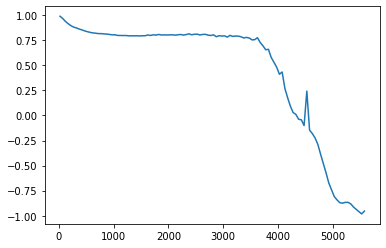

In [23]:

#plt.plot(np.array(list(bin_to_cos_theta_dict.keys())),np.array(list(bin_to_cos_theta_dict.values())))

In [ ]:
from scipy.spatial import distance_matrix
min_distances = np.zeros((len(all_coords),len(all_coords)))
for i, coords_i in enumerate(all_coords):
    for j in range(i+1,len(all_coords)):
        coords_j = all_coords[j]
        min_distances[i,j] = np.median(distance_matrix(coords_i,coords_j))
        min_distances[j,i] = min_distances[i,j]


0
1
2
3
4
5
6
7
8


(0.0, 2000.0)

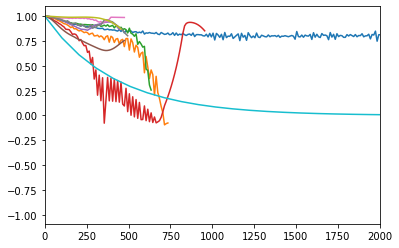

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
from collections import OrderedDict

import matplotlib.pyplot as plt

num_contacts = np.sum(min_distances<200,axis=0)-1
unique_num_contacts = np.unique(num_contacts)
for current_num_contact in unique_num_contacts:
    print(current_num_contact)
    valid_indices = num_contacts==current_num_contact
    avg_current_bin_to_cos_theta_dict = {}
    for current_bin_to_cos_theta_dict in [all_bin_to_cos_theta_dict[i] for i in range(len(valid_indices)) if valid_indices[i]]:
        for bin,cos_thetas in current_bin_to_cos_theta_dict.items():
            if bin in avg_current_bin_to_cos_theta_dict:
                avg_current_bin_to_cos_theta_dict[bin] = np.concatenate((cos_thetas,avg_current_bin_to_cos_theta_dict[bin]))
            else:
                avg_current_bin_to_cos_theta_dict[bin] = cos_thetas
    for bin,cos_thetas in avg_current_bin_to_cos_theta_dict.items():
        avg_current_bin_to_cos_theta_dict[bin] = np.mean(cos_thetas)
    avg_current_bin_to_cos_theta_dict = OrderedDict(sorted(avg_current_bin_to_cos_theta_dict.items()))
    L = np.array(list(avg_current_bin_to_cos_theta_dict.keys()))
    plt.plot(L, avg_current_bin_to_cos_theta_dict.values())
x=np.linspace(0,5000)
plt.plot(x, np.exp(-x/(415)))   
plt.xlim([0,2000])

In [ ]:
all_bin_to_cos_theta_dict[i]

{5.0: 0.9989777361473067,
 15.0: 0.9949496089413529,
 25.0: 0.9878873858564737,
 35.0: 0.9750752046472964,
 45.0: 0.9587260609391802,
 55.0: 0.9433887985380688,
 65.0: 0.9222108472201878,
 75.0: 0.8996479100645558,
 85.0: 0.8811703252010326,
 95.0: 0.8627286220796911,
 105.0: 0.8402651748034332,
 115.0: 0.8185874802824494,
 125.0: 0.8021642271989212,
 135.0: 0.7828978068653771,
 145.0: 0.7647869135046291,
 155.0: 0.7513234535479857,
 165.0: 0.7386840407913949,
 175.0: 0.7240826179182662,
 185.0: 0.7105157160508754,
 195.0: 0.7005530504624521,
 205.0: 0.6891705411620682,
 215.0: 0.6787256767154252,
 225.0: 0.671184098892202,
 235.0: 0.6643001870365594,
 245.0: 0.6566547041834528,
 255.0: 0.6498479601354246,
 265.0: 0.6450990702222258,
 275.0: 0.6399427671485752,
 285.0: 0.6353904647782314,
 295.0: 0.6321717743174696,
 305.0: 0.629181648913616,
 315.0: 0.6256080135683335,
 325.0: 0.6219560981734283,
 335.0: 0.6189352768828204,
 345.0: 0.615076988909743,
 355.0: 0.61126977076195,
 365.0: 

In [ ]:
np.where(num_contacts==0)[0]

array([  1,   5,  10,  11,  17,  18,  22,  23,  25,  33,  35,  36,  41,
        42,  43,  50,  51,  53,  54,  56,  64,  65,  67,  73,  82,  83,
        87,  96,  97,  98, 101, 102, 104, 109, 114, 116, 118, 121, 122,
       124, 125, 129, 130, 132, 138, 145, 148, 149, 153, 155, 157, 158,
       159, 161, 162, 163, 164, 166, 168, 169, 170, 171, 175, 177, 178,
       180, 181, 184, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198,
       200, 201, 203, 204, 205, 207, 212, 215, 216, 218, 220, 221, 227,
       229, 230, 235, 236, 243, 245, 246, 247, 248, 251, 253, 256, 257,
       260, 263, 265, 266, 269, 270, 271, 276, 278, 280, 287, 289, 291,
       292, 297, 301, 302, 303, 304, 307, 308, 326, 327, 329, 331, 333,
       337, 338, 339, 341, 342, 343, 347, 349, 350, 354, 355, 357, 358,
       361, 368, 375, 379, 380, 381, 382, 387, 389, 390, 391, 393, 394,
       395, 396, 397, 399, 404, 408, 415, 416, 417, 418, 419, 420, 422,
       424, 425, 427, 428, 432, 433, 434, 437, 439, 442, 446, 44

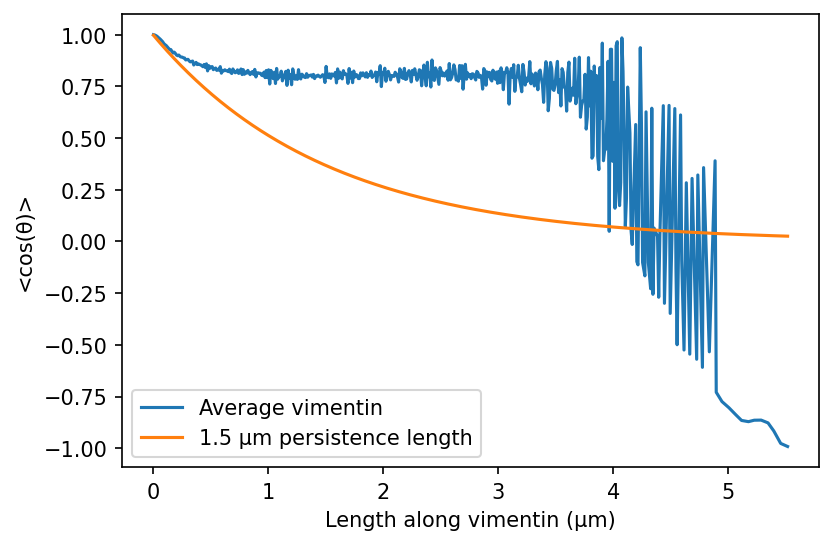

In [ ]:
%matplotlib inline
from collections import OrderedDict

import matplotlib.pyplot as plt

avg_bin_to_cos_theta_dict = {}
for bin,cos_thetas in bin_to_cos_theta_dict.items():
    avg_bin_to_cos_theta_dict[bin] = np.mean(cos_thetas)
avg_bin_to_cos_theta_dict = OrderedDict(sorted(avg_bin_to_cos_theta_dict.items()))
L = np.array(list(avg_bin_to_cos_theta_dict.keys()))
plt.figure(dpi=150)
plt.plot(L/1000, avg_bin_to_cos_theta_dict.values())
plt.plot(L/1000, np.exp(-L/1500))
plt.xlabel('Length along vimentin (\u03BCm)')
plt.ylabel('<cos(\u03B8)>')
plt.legend(['Average vimentin','1.5 \u03BCm persistence length'])


/groups/scicompsoft/home/ackermand/miniconda3/envs/convert-knossos-skeletons/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

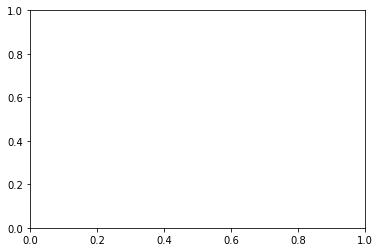

In [ ]:
%matplotlib inline
from collections import OrderedDict

import matplotlib.pyplot as plt

for current_bin_to_cos_theta_dict in all_bin_to_cos_theta_dict:
    avg_current_bin_to_cos_theta_dict = {}
    for bin,cos_thetas in current_bin_to_cos_theta_dict.items():
        avg_current_bin_to_cos_theta_dict[bin] = np.mean(cos_thetas)
    avg_current_bin_to_cos_theta_dict = OrderedDict(sorted(current_bin_to_cos_theta_dict.items()))
    L = np.array(list(avg_current_bin_to_cos_theta_dict.keys()))
    plt.plot(L, avg_current_bin_to_cos_theta_dict.values())
x=np.linspace(0,5000)
plt.plot(x, np.exp(-x/(415)))   


[5803.10268018] [[98017.79243271]]


/tmp/ipykernel_21472/197838870.py:9: RuntimeWarning: invalid value encountered in log
  plt.plot(L[:40],np.log(corr)[:40])
/tmp/ipykernel_21472/197838870.py:10: RuntimeWarning: invalid value encountered in log
  np.polyfit(L[:40], np.log(corr)[:40], 1)


array([-0.0004197, -0.0042016])

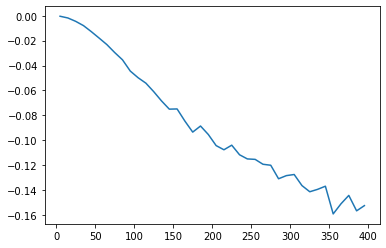

In [ ]:
from scipy.optimize import curve_fit

corr = np.array(list(bin_to_cos_theta_dict.values()))
def func(x, P):
    return np.exp(-x/P)
popt, pcov = curve_fit(func, L[:40],corr[:40])
print(popt,pcov)

plt.plot(L[:40],np.log(corr)[:40])
np.polyfit(L[:40], np.log(corr)[:40], 1)


In [ ]:
import zarr
from numcodecs.gzip import GZip
store = zarr.N5Store("/nrs/cellmap/ackermand/vimentin/convert-knossos-skeletons.n5")
zarr_root = zarr.group(store=store)
ds = zarr_root.create_dataset(
            name="mt_centerAxis",
            data=output,
            shape=output.shape,
            chunks=128,
            write_empty_chunks=True,
            compressor=GZip(level=6),
        )
attributes = ds.attrs
attributes["pixelResolution"] = {
    "dimensions": 3 * [2],
    "unit": "nm",
}
attributes["offsets"] = [8600, 4400, 0] #nm

In [ ]:
np.amax(output)

255

In [ ]:
phi = np.linspace(0, 2.*np.pi, 40)
r = 0.5 + np.cos(phi)         # polar coords
x, y = r * np.cos(phi), r * np.sin(phi)    # convert to cartesian
#And interpolate:

from scipy.interpolate import splprep, splev
tck, u = splprep([x, y],s=0)
unew = np.arange(0, 1.00, 0.01)

new_points = splev(unew, tck)
#Notice that (i) we force interpolation by using s=0, (ii) the parameterization, u, is generated automatically. Now plot the result:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.plot(new_points[0], new_points[1], 'k.')
plt.show()

NameError: name 'np' is not defined

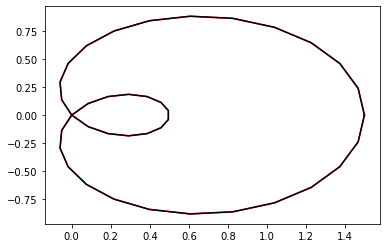

In [ ]:
%matplotlib inline
import numpy as np
from scipy.interpolate import splprep, splev
phi = np.linspace(0, 2.*np.pi, 40)
r = 0.5 + np.cos(phi)         # polar coords
x, y = r * np.cos(phi), r * np.sin(phi)    # convert to cartesian
tck, u = splprep([x, y], s=0)
u_new = np.arange(0,1,.001)
new_points = splev(u, tck)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, 'r')
ax.plot(new_points[0], new_points[1], 'k-')
plt.show()
#print(len(np.unique(tck[0])))